이보시오, 그러면 힘들게 배운 머신러닝은 도대체 언제 써먹는단 말이오?

In [1]:
print('설무아쌤 웁니다')

설무아쌤 웁니다


![SortingHat](./image/SortingHat.jpg)

Magical... 아니고 MachineLearning Sorting Hat 은 어떨까?

학과 <- 학년, 반, 과목이수X5, 과목점수X5  
주어진 정보를 이용하여 신입생에게 학과를 배정해보자... 는 MSH project...  
1,1,2,1,2,2,2,2,5,3,5,3 이니까 그리핀도르... 아니고 전기과!

----------------
<span style="color:yellow">1. pandas 로 데이터 전처리 및 저장<span>

In [2]:
import pandas as pd
df19 = pd.read_csv('./data/1. 19년도-과정이수및평가점수.csv', encoding='euc-kr')

학생구분 은 학년 에 종속되어 결정되는 변수이므로 삭제하고 반 99 는 7로 변경한다.  
또한 비교적 분리가 쉬울 것으로 예상되는 전기과, 스포츠지도과, 아동문헌정보과 만 남긴 후 저장한다.

In [3]:
df19 = df19.replace({'반': {99: 7}}).drop('학생구분', axis=1)
df19 = df19[((df19['학과']=='전기과') | (df19['학과']=='스포츠지도과') | (df19['학과']=='아동문헌정보과'))]
df19.to_csv('./data/pdf19.csv', index=False, encoding='euc-kr')

In [4]:
pdf19 = pd.read_csv('./data/pdf19.csv', encoding='euc-kr')
pdf19

,학과,학년,반,A과목이수,B과목이수,C과목이수,D과목이수,E과목이수,A과목점수,B과목점수,C과목점수,D과목점수,E과목점수
0,스포츠지도과,1,1,2,2,2,2,2,4,6,5,5,4
1,스포츠지도과,1,1,2,2,2,2,2,5,5,0,3,3
2,스포츠지도과,1,1,2,2,2,2,2,2,4,3,3,2
3,스포츠지도과,1,1,2,2,2,2,2,2,5,3,4,4
4,스포츠지도과,1,1,2,2,2,2,2,3,6,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,전기과,3,2,2,2,1,1,2,4,5,5,4,5
325,전기과,3,2,2,2,1,2,2,2,7,6,7,5
326,전기과,3,2,2,1,1,2,2,2,7,6,7,5
327,전기과,3,2,2,2,2,1,1,1,3,3,7,4


In [5]:
print(pdf19[pdf19['학년']==1].shape)
print(pdf19[pdf19['학년']!=1].shape)

(177, 13)
(152, 13)


In [6]:
print(pdf19[pdf19['학과']=='전기과'].shape)
print(pdf19[(pdf19['학과']=='전기과') & (pdf19['학년']==1)].shape)
print(pdf19[(pdf19['학과']=='전기과') & (pdf19['학년']!=1)].shape)

(124, 13)
(76, 13)
(48, 13)


In [7]:
print(pdf19[pdf19['학과']=='스포츠지도과'].shape)
print(pdf19[(pdf19['학과']=='스포츠지도과') & (pdf19['학년']==1)].shape)
print(pdf19[(pdf19['학과']=='스포츠지도과') & (pdf19['학년']!=1)].shape)

(92, 13)
(39, 13)
(53, 13)


In [8]:
print(pdf19[pdf19['학과']=='아동문헌정보과'].shape)
print(pdf19[(pdf19['학과']=='아동문헌정보과') & (pdf19['학년']==1)].shape)
print(pdf19[(pdf19['학과']=='아동문헌정보과') & (pdf19['학년']!=1)].shape)

(113, 13)
(62, 13)
(51, 13)


전체 pdf19 데이터 중 20%를 테스트 세트로 만들고 나머지를 훈련 세트로 만든다.

In [9]:
pdf19_input = pdf19.drop('학과', axis=1).to_numpy()
pdf19_input

array([[1, 1, 2, ..., 5, 5, 4],
       [1, 1, 2, ..., 0, 3, 3],
       [1, 1, 2, ..., 3, 3, 2],
       ...,
       [3, 2, 2, ..., 6, 7, 5],
       [3, 2, 2, ..., 3, 7, 4],
       [3, 2, 1, ..., 6, 7, 5]], dtype=int64)

In [10]:
pdf19_target = pdf19['학과'].to_numpy()

In [11]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(pdf19_input, pdf19_target, test_size=0.2, random_state=33)

----------------
<span style="color:yellow">2. k-최근접 이웃 분류<span>

훈련 세트 중 다시 20%를 검증 세트로 만든다.

In [12]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=33)

In [13]:
print(sub_input.shape, val_input.shape)

(210, 12) (53, 12)


표준화 전처리

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(sub_input)
sub_scaled = ss.transform(sub_input)
val_scaled = ss.transform(val_input)

확률 예측

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(sub_scaled, sub_target)
print(kn.score(sub_scaled, sub_target))
print(kn.score(val_scaled, val_target))

0.7857142857142857
0.6226415094339622


스코어는 걱정했던 것만큼 나쁘지는 않으나 과대적합된 상태이다.

In [16]:
kn.predict(val_scaled[:10])

array(['전기과', '아동문헌정보과', '스포츠지도과', '전기과', '아동문헌정보과', '전기과', '전기과', '전기과',
       '전기과', '전기과'], dtype=object)

In [17]:
val_target[:10]

array(['전기과', '아동문헌정보과', '스포츠지도과', '전기과', '아동문헌정보과', '스포츠지도과', '전기과',
       '전기과', '전기과', '아동문헌정보과'], dtype=object)

----------------
<span style="color:yellow">3. 로지스틱 회귀<span>

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=2, max_iter=100)
lr.fit(sub_scaled, sub_target)
print(lr.score(sub_scaled, sub_target))
print(lr.score(val_scaled, val_target))

0.580952380952381
0.4716981132075472


k-최근접 이웃 분류 보다 오히려 스코어가 많이 떨어지는 과소적합이다.  
로지스틱 회귀가 사용하는 선형 방정식이 문제에 적합하지 않은 모델일 가능성이 있다.

----------------
<span style="color:yellow">4. 확률적 경사 하강법<span>

In [26]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='hinge', max_iter=10000, tol=None, random_state=33)
sc.fit(sub_scaled, sub_target)
print(sc.score(sub_scaled, sub_target))
print(sc.score(val_scaled, val_target))

0.580952380952381
0.5283018867924528


로지스틱 회귀보다는 약간 더 좋지만 선형모델이라서 여전히 과소적합이다.

----------------
<span style="color:yellow">5. 결정 트리<span>

결정 트리는 표준화 전처리가 필요하지 않으므로 표준화 전처리 전의 데이터를 사용한다.

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, random_state=33)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.7238095238095238
0.6415094339622641


max_depth=4 에서 최선의 결과를 보인다. k-최근접 이웃 분류 보다 검증 스코어는 향상되었고 과대적합도 줄어들었다. 

In [225]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.rc('font', family='D2Coding')

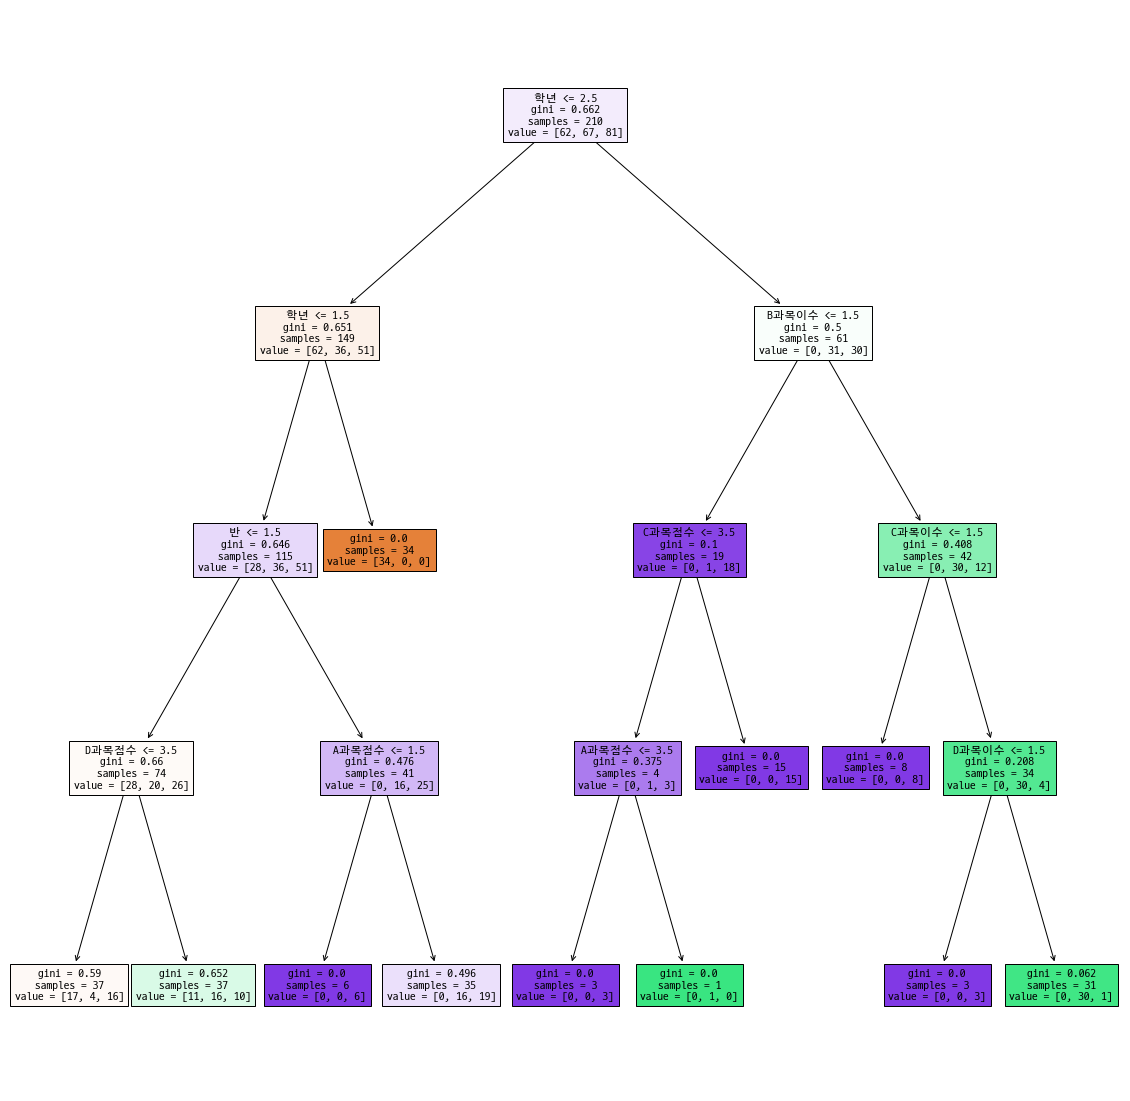

<Figure size 432x288 with 0 Axes>

In [292]:
%matplotlib inline
plt.figure(figsize=(20, 20))
plot_tree(dt, max_depth=4, filled=True, feature_names=['학년', '반', 'A과목이수', 'B과목이수','C과목이수','D과목이수','E과목이수', 'A과목점수', 'B과목점수', 'C과목점수', 'D과목점수', 'E과목점수'])
plt.show()

In [279]:
dt.classes_

array(['스포츠지도과', '아동문헌정보과', '전기과'], dtype=object)

In [30]:
dt.feature_importances_[:2]

array([0.46447016, 0.08017238])

In [282]:
dt.feature_importances_[2:7]

array([0.        , 0.15515703, 0.13659684, 0.06940001, 0.        ])

In [31]:
dt.feature_importances_[7:]

array([0.04931729, 0.        , 0.00534705, 0.03953925, 0.        ])

특성 중요도에서 학년이 0.46447016 로 가장 중요하게 나왔으며 그 다음으로 B 과목과 C 과목의 이수 여부가 각각 0.15515703, 0.13659684 로 중요하게 나왔다.

[머신 러닝        : 6_machine_learning.ipynb](./6_machine_learning.ipynb)  